In [63]:
import numpy as np
import scipy.linalg as la
import scipy.special as sp
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams["lines.linewidth"] = 2
mpl.rcParams["lines.markersize"] = 4
mpl.rcParams.update({'font.size': 16})
mpl.rcParams.update({'figure.autolayout': True})
mpl.rcParams['lines.markersize'] = 7

plt.rcParams['text.usetex'] = True

In [4]:
# Need this for err0
def init(d,m):
    W = np.random.normal(scale=1/np.sqrt(d*m),size=(d,m))
    a = np.random.binomial(1,.5,size=(m,1))
    a[a<.5] = -1
    return [W,a]
def phi(x):
    return .5*x*(1+sp.erf(x/np.sqrt(2)))
def dphi(x):
    return .5+.5*sp.erf(x/np.sqrt(2))+x/np.sqrt(2*np.pi)*np.exp(-x**2/2)
def grad(W,a,X,y):
    A = X.T@W
    loss_vec = phi(A)@a - y
    f = .5*la.norm(loss_vec)**2
    g = la.khatri_rao(a*dphi(A).T,X)@loss_vec
    g = np.reshape(g, np.shape(W), order='F')
    return [f,g]

np.random.seed(1717)

d = 10

m_true = 20
[W_true,a_true] = init(d,m_true)

m = 10
[W,a] = init(d,m)

n = 250
X = np.random.normal(size=(d,n))
X /= la.norm(X,axis=0)
y = phi(X.T@W_true)@a_true
[f,g] = grad(W,a,X,y)
err0 = la.norm(g)**2

In [21]:
def find_deltas_simple( fileName, leftLimit = 0.9, rightLimit = 0.99 ):
    errs = np.loadtxt(fileName,  delimiter=',')
    cdf = np.arange(len(errs))/float(len(errs))
    errs = np.sort(errs)
    num_trials = len(errs)
    winl = int(leftLimit*num_trials)
    winr = int(rightLimit*num_trials)
    deltas = 1-cdf[winl:winr] # behavior of delta near 1 is not interesting; we care about delta --> 0
    return deltas, errs[winl:winr]/err0
deltas, data1 = find_deltas_simple('weibull1_errs.csv')
deltas, data2 = find_deltas_simple('weibull2_errs.csv')
deltas, data3 = find_deltas_simple('weibull3_errs.csv')

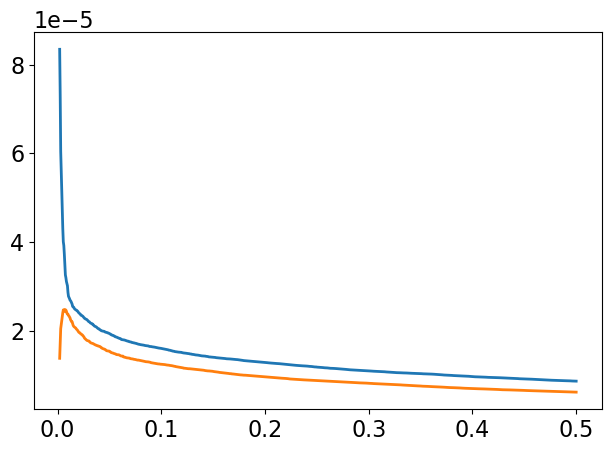

In [56]:
# Let's get some variance information
def find_deltas_blocked( fileName, leftLimit = 0.5, rightLimit = 0.999, num_blocks=5 ):
    errs = np.loadtxt(fileName,  delimiter=',')
    num_trials = len(errs)
    n = num_trials / num_blocks
    errsBlock = errs.reshape( (num_blocks, int(n)) )
    cdf  = np.arange(n)/float(n)  # straight line from 0 to 1
    errsBlock = np.sort(errsBlock, axis=1)
    winl = int(leftLimit*n)
    winr = int(min( n-3, int(rightLimit*n) ))
    deltas = 1-cdf[winl:winr] # behavior of delta near 1 is not interesting; we care about delta --> 0
    mn = np.mean( errsBlock[:,winl:winr]/err0, axis=0 )
    std = np.std( errsBlock[:,winl:winr]/err0, axis=0, ddof=1 )
    return deltas, mn, std

deltas_blocked, mn1, std1 = find_deltas_blocked('weibull1_errs.csv')
deltas_blocked, mn2, std2 = find_deltas_blocked('weibull2_errs.csv')
deltas_blocked, mn3, std3 = find_deltas_blocked('weibull3_errs.csv')

plt.plot(deltas_blocked, mn1+std1)
plt.plot(deltas_blocked, mn1-std1)

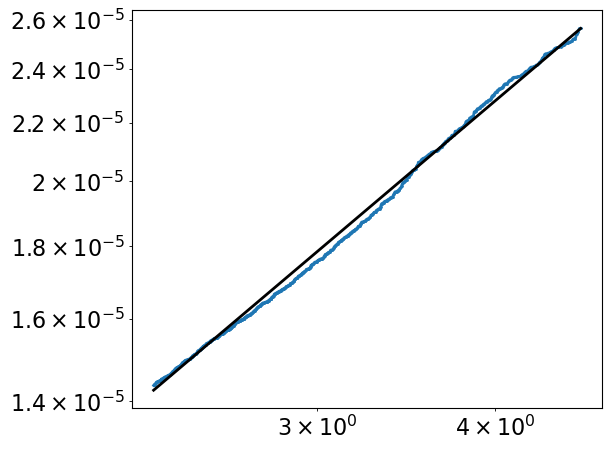

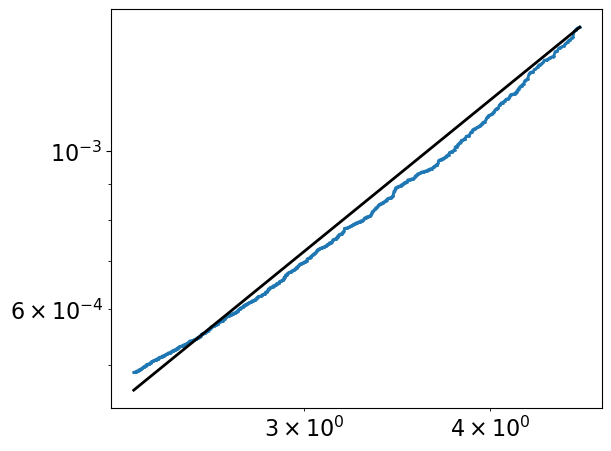

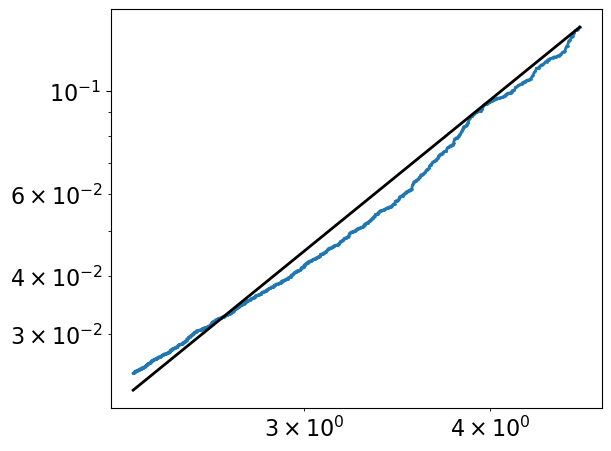

In [23]:
fig, ax = plt.subplots()
# fig.set_figwidth(9.6)
ax.loglog(np.log(1/deltas),data1,'o-',markersize=1)
ax.loglog(np.log(1/deltas),data1[-1]*(np.log(1/deltas)/np.log(1/deltas[-1]))**.85,'k')
# plt.savefig('weibull1.pdf')
plt.show()


fig, ax = plt.subplots()
# fig.set_figwidth(9.6)
ax.loglog(np.log(1/deltas),data2,'o-',markersize=1)
ax.loglog(np.log(1/deltas),data2[-1]*(np.log(1/deltas)/np.log(1/deltas[-1]))**1.7,'k')
# plt.savefig('weibull2.pdf')
plt.show()

fig, ax = plt.subplots()
# fig.set_figwidth(9.6)
ax.loglog(np.log(1/deltas),data3,'o-',markersize=1)
ax.loglog(np.log(1/deltas),data3[-1]*(np.log(1/deltas)/np.log(1/deltas[-1]))**2.6,'k')
# plt.savefig('weibull3.pdf')
plt.show()

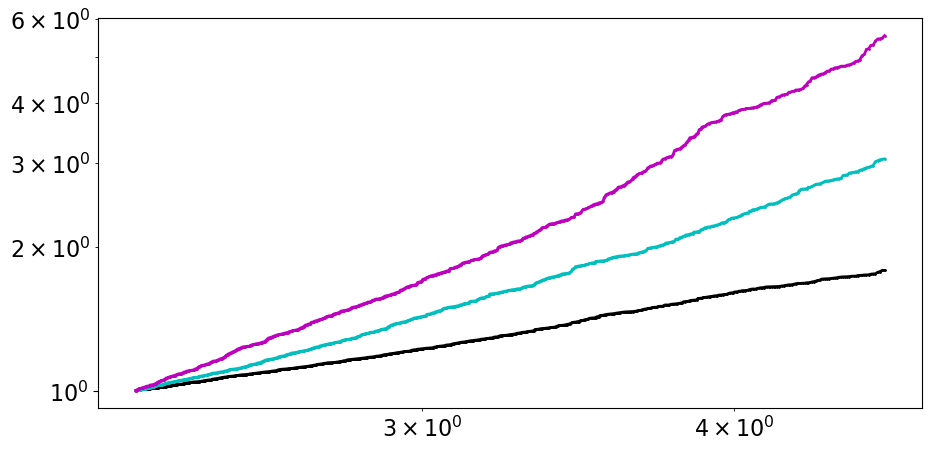

In [9]:
fig, ax = plt.subplots()
fig.set_figwidth(9.6)
ax.loglog(np.log(1/deltas),data1/data1[0],'o-',color='k',markersize=1)
ax.loglog(np.log(1/deltas),data2/data2[0],'o-',color='c',markersize=1)
ax.loglog(np.log(1/deltas),data3/data3[0],'o-',color='m',markersize=1)

# ax.loglog(np.log(1/deltas),data3[-1]*(np.log(1/deltas)/np.log(1/deltas[-1]))**2.6,'k')

# plt.savefig('weibulltogether.pdf')
plt.show()

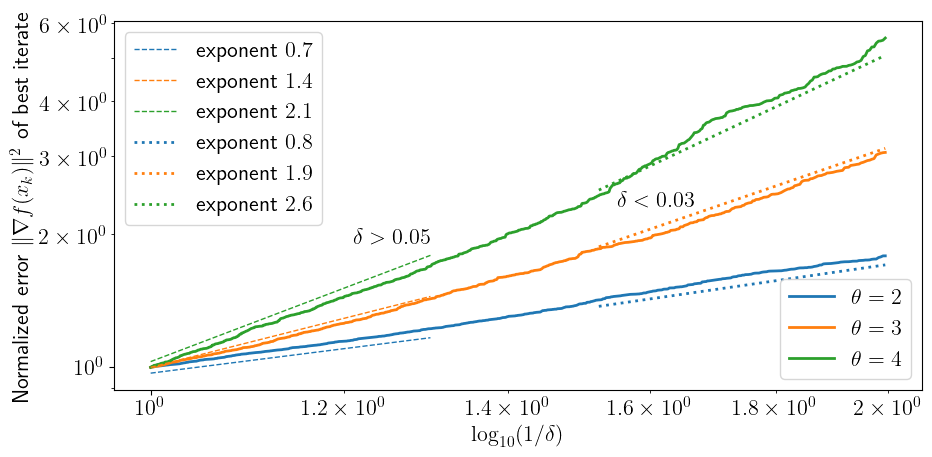

In [179]:
# Stephen modifying
deltas, data1 = find_deltas_simple('weibull1_errs.csv', leftLimit = 0.9)
deltas, data2 = find_deltas_simple('weibull2_errs.csv', leftLimit = 0.9)
deltas, data3 = find_deltas_simple('weibull3_errs.csv', leftLimit = 0.9)

fig, ax = plt.subplots()
fig.set_figwidth(9.6)
fcn = lambda x : np.log10( 1/x )
# fcn = lambda x : np.log( 1/x )
# fcn = lambda x : 1/x
ax1, = ax.loglog(fcn(deltas),data1/data1[0],'-',linewidth=2,label=f'$\\theta=2$')
ax2, = ax.loglog(fcn(deltas),data2/data2[0],'-',linewidth=2,label=f'$\\theta=3$')
ax3, = ax.loglog(fcn(deltas),data3/data3[0],'-',linewidth=2,label=f'$\\theta=4$')
# ax1, = ax.loglog(np.log(1/deltas),data1,'-',linewidth=2,label=f'$\\theta=2$')
# ax2, = ax.loglog(np.log(1/deltas),data2,'-',linewidth=2,label=f'$\\theta=3$')
# ax3, = ax.loglog(np.log(1/deltas),data3,'-',linewidth=2,label=f'$\\theta=4$')

cutoff = 0.05
ind1 = deltas > cutoff
# ind2 = np.logical_not(ind1)
ind2 = deltas <= 0.03 
e1,=ax.loglog(fcn(deltas[ind1]),0.97*fcn(deltas[ind1])**0.7,'--',linewidth=1,color=ax1.get_color(),label='exponent $0.7$' )
e2,=ax.loglog(fcn(deltas[ind1]),1.0*fcn(deltas[ind1])**1.4,'--',linewidth=1,color=ax2.get_color(),label='exponent $1.4$' )
e3,=ax.loglog(fcn(deltas[ind1]),1.03*fcn(deltas[ind1])**2.1,'--',linewidth=1,color=ax3.get_color(),label='exponent $2.1$' )

e4,=ax.loglog(fcn(deltas[ind2]),.98*fcn(deltas[ind2])**0.8,':',linewidth=2,color=ax1.get_color(),label='exponent $0.8$')
e5,=ax.loglog(fcn(deltas[ind2]),.84*fcn(deltas[ind2])**1.9,':',linewidth=2,color=ax2.get_color(),label='exponent $1.9$' )
e6,=ax.loglog(fcn(deltas[ind2]),.84*fcn(deltas[ind2])**2.6,':',linewidth=2,color=ax3.get_color(),label='exponent $2.6$' )


# ax.set_ylim( top=3 )

plt.xlabel(f'$\log_{{10}}(1/\delta)$')
plt.ylabel(f'Normalized error $\|\\nabla f(x_k)\|^2$ of best iterate')
# plt.grid(True,which='both')

# ax.legend()

# Create a legend for the first line.
first_legend = ax.legend(handles=[ax1,ax2,ax3], loc='lower right')
# Add the legend manually to the Axes.
ax.add_artist(first_legend)
# Create another legend for the second line.
ax.legend(handles=[e1,e2,e3,e4,e5,e6], loc='upper left')

plt.text(1.21, 1.9, f'$\delta > 0.05$' )
plt.text(1.55, 2.3, f'$\delta < 0.03$' )
# plt.savefig('weibulltogether_differentDeltaRegimes.pdf')
plt.show()

In [ ]:
# Extreme case: delta = 1, so log(1/1) = 0
# or, delta = 0.5, so log10(2) = 0.3
# Though we start at delta = 0.1 so log10(10) = 1

# vs delta ~ 1/1000, so log10( 1000 ) = 3

# So left of plot is relatively large delta, right of plot is small delta

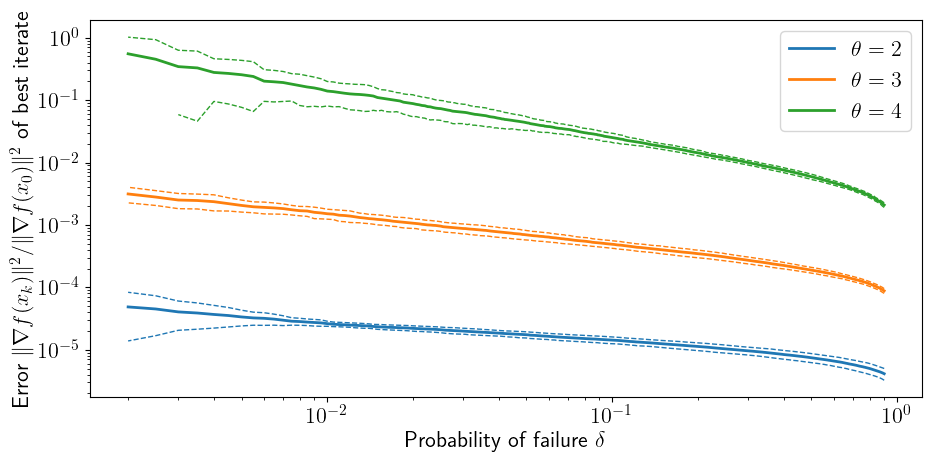

In [93]:
# Stephen modifying, doing blocked
leftLimit = 0.1
rightLimit = 1 #0.995
num_blocks=5
deltas_blocked, mn1, std1 = find_deltas_blocked('weibull1_errs.csv',leftLimit=leftLimit,rightLimit=rightLimit,num_blocks=num_blocks)
deltas_blocked, mn2, std2 = find_deltas_blocked('weibull2_errs.csv',leftLimit=leftLimit,rightLimit=rightLimit,num_blocks=num_blocks)
deltas_blocked, mn3, std3 = find_deltas_blocked('weibull3_errs.csv',leftLimit=leftLimit,rightLimit=rightLimit,num_blocks=num_blocks)

fig, ax = plt.subplots()
fig.set_figwidth(9.6)
a1 = ax.loglog(deltas_blocked,mn1,'-',linewidth=2,label=f'$\\theta=2$')
a2 = ax.loglog(deltas_blocked,mn2,'-',linewidth=2,label=f'$\\theta=3$')
a3 = ax.loglog(deltas_blocked,mn3,'-',linewidth=2,label=f'$\\theta=4$')
# a1 = ax.loglog(np.log(1/deltas_blocked),mn1,'-',linewidth=2,label=r'$\theta=2$')
# a2 = ax.loglog(np.log(1/deltas_blocked),mn2,'-',linewidth=2,label=r'$\theta=3$')
# a3 = ax.loglog(np.log(1/deltas_blocked),mn3,'-',linewidth=2,label=r'$\theta=4$')

ax.loglog(deltas_blocked,mn1+std1,'--',linewidth=1,color=a1[0].get_color() )
ax.loglog(deltas_blocked,mn1-std1,'--',linewidth=1,color=a1[0].get_color() )
ax.loglog(deltas_blocked,mn2+std2,'--',linewidth=1,color=a2[0].get_color() )
ax.loglog(deltas_blocked,mn2-std2,'--',linewidth=1,color=a2[0].get_color() )
ax.loglog(deltas_blocked,mn3+std3,'--',linewidth=1,color=a3[0].get_color() )
kk = 2
ax.loglog(deltas_blocked[:-kk],mn3[:-kk]-std3[:-kk],'--',linewidth=1,color=a3[0].get_color() ) # manually adjust

plt.xlabel(f'Probability of failure $\delta$')
plt.ylabel(f'Error $\|\\nabla f(x_k)\|^2/\|\\nabla f(x_0)\|^2$ of best iterate')

ax.legend()
# plt.savefig('weibulltogether_errorBars.pdf')
plt.show()